In [223]:
#we import pandas library to manipulate data
import pandas as pd

#we load datasets and print the head to see how they look like
cash_request_df = pd.read_csv('extract - cash request - data analyst.csv')
fees_df = pd.read_csv('extract-fees-mav.csv')

display(cash_request_df.head())
display(fees_df.head())
#We can see that are columns with the same name but different meaning, so if we want to merge everything, we have to change columns names accordingly


,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


,id,cash_request_id,type,status,category,total_amount,reason,created_at,updated_at,paid_at,from_date,to_date,charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [224]:
#by looking at the data, looks like we have one dataframe with users and cash requests and then another dataframe with the corresponding fee, let's look at first example:
cash_request_df[cash_request_df['id'] == 14941.0]

,id,amount,status,created_at,updated_at,user_id,moderated_at,deleted_account_id,reimbursement_date,cash_request_received_date,money_back_date,transfer_type,send_at,recovery_status,reco_creation,reco_last_update
9954,14941,100.0,direct_debit_rejected,2020-09-07 10:46:57.780263+00,2020-12-20 22:40:42.540135+00,35661.0,NaN,NaN,2020-10-01 22:00:00+00,NaN,2020-10-06 22:00:00+00,instant,2020-09-14 10:46:57.735172+00,pending,2020-10-11 22:52:52.274832+00,2020-12-20 22:40:42.556534+00


In [225]:
#to differenciate if the columns refers to the CR or fhe fee we change column names of orignal datasets
# Rename repeated columns in cash_request_df
cash_request_df.rename(columns=lambda x: f"CR_{x}", inplace=True)
# Rename repeated columns in fees_df
fees_df.rename(columns=lambda x: f"F_{x}", inplace=True)

display(cash_request_df.head())
display(fees_df.head())

,CR_id,CR_amount,CR_status,CR_created_at,CR_updated_at,CR_user_id,CR_moderated_at,CR_deleted_account_id,CR_reimbursement_date,CR_cash_request_received_date,CR_money_back_date,CR_transfer_type,CR_send_at,CR_recovery_status,CR_reco_creation,CR_reco_last_update
0,5,100.0,rejected,2019-12-10 19:05:21.596873+00,2019-12-11 16:47:42.40783+00,804.0,2019-12-11 16:47:42.405646+00,NaN,2020-01-09 19:05:21.596363+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
1,70,100.0,rejected,2019-12-10 19:50:12.34778+00,2019-12-11 14:24:22.900054+00,231.0,2019-12-11 14:24:22.897988+00,NaN,2020-01-09 19:50:12.34778+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
2,7,100.0,rejected,2019-12-10 19:13:35.82546+00,2019-12-11 09:46:59.779773+00,191.0,2019-12-11 09:46:59.777728+00,NaN,2020-01-09 19:13:35.825041+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
3,10,99.0,rejected,2019-12-10 19:16:10.880172+00,2019-12-18 14:26:18.136163+00,761.0,2019-12-18 14:26:18.128407+00,NaN,2020-01-09 19:16:10.879606+00,NaN,NaN,regular,NaN,NaN,NaN,NaN
4,1594,100.0,rejected,2020-05-06 09:59:38.877376+00,2020-05-07 09:21:55.34008+00,7686.0,2020-05-07 09:21:55.320193+00,NaN,2020-06-05 22:00:00+00,NaN,NaN,regular,NaN,NaN,NaN,NaN


,F_id,F_cash_request_id,F_type,F_status,F_category,F_total_amount,F_reason,F_created_at,F_updated_at,F_paid_at,F_from_date,F_to_date,F_charge_moment
0,6537,14941.0,instant_payment,rejected,NaN,5.0,Instant Payment Cash Request 14941,2020-09-07 10:47:27.42315+00,2020-10-13 14:25:09.396112+00,2020-12-17 14:50:07.47011+00,NaN,NaN,after
1,6961,11714.0,incident,accepted,rejected_direct_debit,5.0,rejected direct debit,2020-09-09 20:51:17.998653+00,2020-10-13 14:25:15.537063+00,2020-12-08 17:13:10.45908+00,NaN,NaN,after
2,16296,23371.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 23371,2020-10-23 10:10:58.352972+00,2020-10-23 10:10:58.352994+00,2020-11-04 19:34:37.43291+00,NaN,NaN,after
3,20775,26772.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 26772,2020-10-31 15:46:53.643958+00,2020-10-31 15:46:53.643982+00,2020-11-19 05:09:22.500223+00,NaN,NaN,after
4,11242,19350.0,instant_payment,accepted,NaN,5.0,Instant Payment Cash Request 19350,2020-10-06 08:20:17.170432+00,2020-10-13 14:25:03.267983+00,2020-11-02 14:45:20.355598+00,NaN,NaN,after


In [226]:
#let's also change the name of F_cash_request_id to CR_id so they have the same column name in both dataset as it is the same unique values
fees_df.rename(columns={'F_cash_request_id': 'CR_id'}, inplace=True)

In [227]:
#we are going to merge them now but before merging let's print dimensions of dataset to check later that merging makes sense
print(cash_request_df.shape)
print(fees_df.shape)

(23970, 16)
(21061, 13)


In [228]:
#now let's merge so we have all cash requests and their fees
merged_df = pd.merge(left = cash_request_df, right = fees_df, left_on = 'CR_id', right_on = 'CR_id', how = 'left') #we will loose fees not associated to any CR, will study them separately

merged_df.to_csv("merged.csv")
print(merged_df.shape)
merged_df.sample(10)



(32094, 28)


,CR_id,CR_amount,CR_status,CR_created_at,CR_updated_at,CR_user_id,CR_moderated_at,CR_deleted_account_id,CR_reimbursement_date,CR_cash_request_received_date,...,F_status,F_category,F_total_amount,F_reason,F_created_at,F_updated_at,F_paid_at,F_from_date,F_to_date,F_charge_moment
4000,9188,100.0,rejected,2020-07-21 06:18:35.337902+00,2020-07-21 13:53:10.082212+00,NaN,2020-07-21 13:53:10.079714+00,3382.0,2020-08-14 22:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7984,13096,50.0,rejected,2020-08-19 14:52:28.548347+00,2020-08-20 07:52:38.236526+00,NaN,2020-08-20 07:52:38.229869+00,6469.0,2020-09-08 22:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13388,2519,100.0,money_back,2020-06-03 11:45:06.265936+00,2020-12-18 13:08:55.431203+00,11551.0,2020-06-03 14:09:18.730749+00,NaN,2020-07-06 22:00:00+00,2020-06-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10121,23158,100.0,money_back,2020-10-22 17:10:40.100248+00,2021-01-05 22:00:42.194746+00,87128.0,NaN,NaN,2021-01-05 23:00:00+00,2020-10-23,...,cancelled,NaN,5.0,Postpone Cash Request 23158,2020-10-30 17:54:49.428436+00,2020-10-30 17:54:49.42846+00,NaN,2020-11-05 22:00:00+00,2020-11-07 23:00:00+00,before
14530,8186,100.0,money_back,2020-07-15 13:35:12.905772+00,2020-12-18 13:09:14.508927+00,17985.0,2020-07-17 08:43:21.952854+00,NaN,2020-08-06 13:35:24.833+00,2020-07-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3155,7669,50.0,rejected,2020-07-12 08:27:58.323027+00,2020-07-12 16:16:04.518596+00,13661.0,2020-07-12 16:16:04.516412+00,NaN,2020-08-10 22:00:00+00,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21099,8713,100.0,money_back,2020-07-17 16:32:56.505459+00,2020-12-18 13:10:50.728127+00,NaN,2020-07-19 15:04:03.394909+00,21706.0,2020-09-02 22:00:00+00,2020-07-21,...,cancelled,NaN,5.0,Postpone Cash Request 8713,2020-08-24 06:56:16.759476+00,2020-10-13 14:25:17.098809+00,NaN,2020-09-02 22:00:00+00,2020-09-12 22:00:00+00,after
26395,17383,60.0,money_back,2020-09-23 05:10:45.022685+00,2020-12-18 13:12:15.999291+00,46065.0,2020-09-23 09:05:46.636155+00,NaN,2020-10-06 10:00:00+00,2020-09-23,...,accepted,NaN,5.0,Postpone Cash Request 17383,2020-09-25 17:25:35.723381+00,2020-10-13 14:25:13.927581+00,2020-09-25 17:25:40.165388+00,2020-10-23 22:00:00+00,2020-11-03 11:00:00+00,before
12664,727,100.0,direct_debit_rejected,2020-02-23 11:46:01.598371+00,2020-12-18 22:46:09.809272+00,354.0,2020-02-24 15:30:09.044882+00,NaN,2020-03-05 23:00:00+00,2020-02-25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23267,16049,100.0,money_back,2020-09-14 11:23:42.231293+00,2020-12-18 13:11:23.111072+00,35859.0,NaN,NaN,2020-10-05 22:00:00+00,NaN,...,accepted,NaN,5.0,Instant Payment Cash Request 16049,2020-09-14 12:24:52.017319+00,2020-10-13 14:25:11.26539+00,2020-10-06 19:50:32.094997+00,NaN,NaN,after


In [229]:
#this makes sense? we have that the length of merged is greater thatn the length of cash requests, which means we have charque requests ids with more than one fee? could we have some null values?
merged_df.isnull().sum()

CR_id                                0
CR_amount                            0
CR_status                            0
CR_created_at                        0
CR_updated_at                        0
CR_user_id                        2572
CR_moderated_at                  10335
CR_deleted_account_id            29521
CR_reimbursement_date                0
CR_cash_request_received_date     7945
CR_money_back_date                8177
CR_transfer_type                     0
CR_send_at                        9416
CR_recovery_status               24894
CR_reco_creation                 24894
CR_reco_last_update              24894
F_id                             11037
F_type                           11037
F_status                         11037
F_category                       29898
F_total_amount                   11037
F_reason                         11037
F_created_at                     11037
F_updated_at                     11037
F_paid_at                        16563
F_from_date              

In [230]:
#looks like there are charge requests with no fees which makes sense, but let's check if the size of the merged_df is justified by checking if a cash request could have more than one fee
CR_multiple_fees = merged_df.groupby('CR_id')['F_id'].nunique().reset_index()
CR_multiple_fees.sample(10)

,CR_id,F_id
18450,21093,1
14971,17435,2
13544,15934,0
4545,5584,0
1348,1431,0
858,931,0
18893,21558,1
14377,16820,1
14454,16903,1
377,444,0


In [231]:
#for now we dont want to clean any data because the meaning of NaN makes sense in the colums, depending on the info we wanna get.

<center>
  <h1><b>METRICS TO ANALYZE</b></h1>
</center>

<span style="font-size:22px;">Frequency of Service Usage</span>

In [232]:
#We need to group data by userid, userdid and then count the number of cash requests over a period: daily, monthly and yearly. But first, we need to convert created_at column to datetime
merged_df['CR_created_at'] = pd.to_datetime(merged_df['CR_created_at'])

In [233]:
#lets create a new column called CR_creation_date to get just the date and ease filtering later
merged_df['CR_creation_date'] = merged_df['CR_created_at'].dt.date


In [234]:
#We group per creation date and then we count the number of CR_id. Here it does no matter if we use count or nunique because CR with same ID are created in the same date
daily_service_usage = merged_df.groupby(['CR_creation_date'])['CR_id'].count().reset_index()
daily_service_usage.rename(columns={'CR_id': 'CR_id_count'}, inplace=True)
display(daily_service_usage.head())
display(daily_service_usage.describe())

#From describe function we can check that on average around 97 CR are received per day. A typical value of CR per day sould be 38 and for some reasons some days we can have high CR demand.

,CR_creation_date,CR_id_count
0,2019-11-19,1
1,2019-12-09,1
2,2019-12-10,18
3,2019-12-11,22
4,2019-12-12,25


,CR_id_count
count,330.000000
mean,97.254545
std,115.399038
min,1.000000
25%,9.000000
50%,38.000000
75%,165.250000
max,694.000000


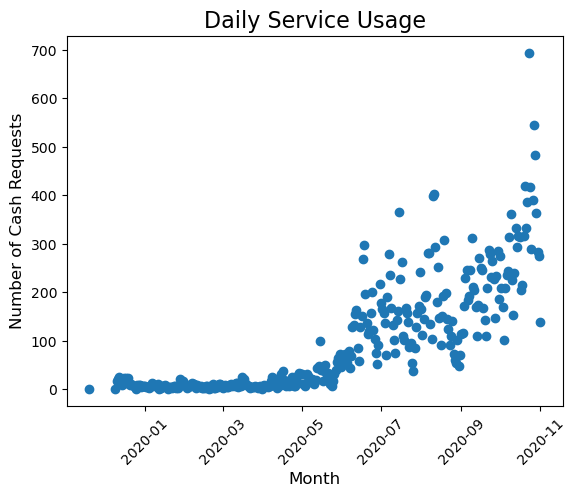

In [235]:
#We know plot the data in scatter format to check what the tendency could be

import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(daily_service_usage['CR_creation_date'],daily_service_usage['CR_id_count'])
plt.title("Daily Service Usage", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cash Requests", fontsize=12)
plt.xticks(rotation=45)
plt.show()

plt.show()

#Looks like the shape is a bit exponential! 

In [236]:
#now we create another extra column for the month, we will filter by month later

merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')
monthly_service_usage = merged_df.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()    #here is important not repeating same CR_id
monthly_service_usage.rename(columns={'CR_id': 'CR_id_count'}, inplace=True)
display(monthly_service_usage.head())
display(monthly_service_usage.describe())

#From the printed data we can see some outliers that we will consider to clean data later

C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\2167455607.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')


,CR_creation_month,CR_id_count
0,2019-11,1
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244


,CR_id_count
count,13.000000
mean,1843.846154
std,2344.271914
min,1.000000
25%,223.000000
50%,473.000000
75%,3417.000000
max,7725.000000


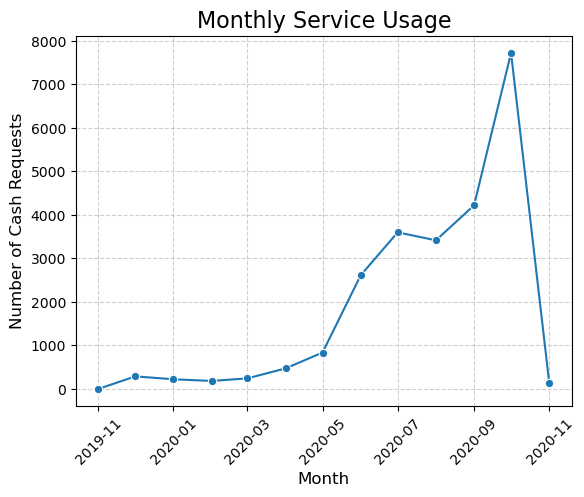

In [237]:
#Now we plot the data per month

import matplotlib.pyplot as plt
import seaborn as sns

#we change the datatype so we can represent it on x axis
monthly_service_usage['CR_creation_month'] = monthly_service_usage['CR_creation_month'].dt.to_timestamp()

sns.lineplot(data=monthly_service_usage, x='CR_creation_month', y='CR_id_count', marker='o')
plt.title("Monthly Service Usage", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cash Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [238]:
#maybe the data set is not showing complete data records so we will get rid of first and last month of the records.

merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')
monthly_service_usage = merged_df.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()    #here is important not repeating same CR_id
monthly_service_usage.rename(columns={'CR_id': 'CR_id_count'}, inplace=True)
first_month = monthly_service_usage['CR_creation_month'].min()
last_month = monthly_service_usage['CR_creation_month'].max()

filtered_monthly_service_usage = monthly_service_usage[
    (monthly_service_usage['CR_creation_month'] > first_month) &
    (monthly_service_usage['CR_creation_month'] < last_month)
]

display(filtered_monthly_service_usage.head())
display(filtered_monthly_service_usage.describe())



C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\236380544.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df['CR_creation_month'] = merged_df['CR_created_at'].dt.to_period('M')


,CR_creation_month,CR_id_count
1,2019-12,289
2,2020-01,223
3,2020-02,184
4,2020-03,244
5,2020-04,473


,CR_id_count
count,11.000000
mean,2166.272727
std,2418.772585
min,184.000000
25%,266.500000
50%,837.000000
75%,3509.000000
max,7725.000000


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\439382129.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_monthly_service_usage['CR_creation_month'] = filtered_monthly_service_usage['CR_creation_month'].dt.to_timestamp()


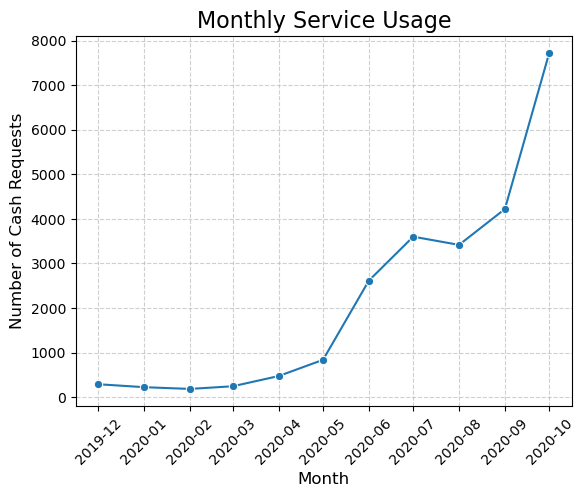

In [239]:
#Now we plot the data per month again

import matplotlib.pyplot as plt
import seaborn as sns

#we change the datatype so we can represent it on x axis
filtered_monthly_service_usage['CR_creation_month'] = filtered_monthly_service_usage['CR_creation_month'].dt.to_timestamp()

sns.lineplot(data=filtered_monthly_service_usage, x='CR_creation_month', y='CR_id_count', marker='o')
plt.title("Monthly Service Usage", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Cash Requests", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\1800866948.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  merged_df_copy['CR_user_id'].fillna(merged_df_copy['CR_deleted_account_id'], inplace=True)
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\1800866948.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  merged_df_copy['CR_creation_month'] = merged_df_copy['CR_created_at'].dt.to_period('M')


,CR_creation_month,CR_user_id,CR_usage_count
0,2019-11,47.0,1
1,2019-12,35.0,2
2,2019-12,47.0,1
3,2019-12,52.0,1
4,2019-12,53.0,1
5,2019-12,68.0,1
6,2019-12,77.0,1
7,2019-12,83.0,1
8,2019-12,90.0,1
9,2019-12,91.0,1


,CR_creation_month,Average_CR_usage_per_user
0,2019-11,1.000000
1,2019-12,1.133333
2,2020-01,1.137755
3,2020-02,1.082353
4,2020-03,1.134884
5,2020-04,1.123515
6,2020-05,1.146575
7,2020-06,1.244645
8,2020-07,1.328292
9,2020-08,1.314736


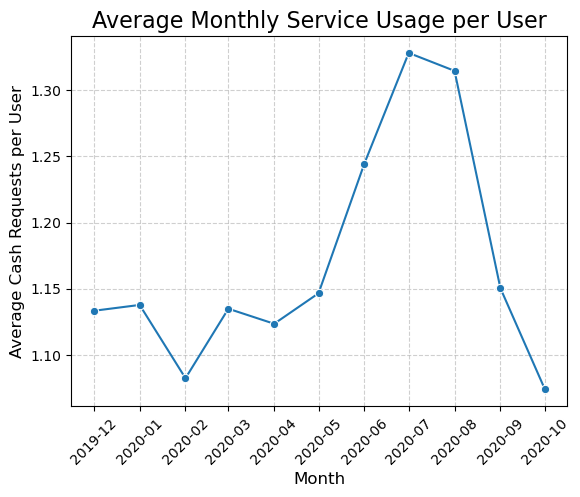

In [240]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# we create a copy so we can fill null data depending on the question we want to answer so we do not modify original merged dataset
merged_df_copy = merged_df.copy()

# In this case, we are going to consider users
merged_df_copy['CR_user_id'].fillna(merged_df_copy['CR_deleted_account_id'], inplace=True)

# again we create a colum with creation month 
merged_df_copy['CR_creation_month'] = merged_df_copy['CR_created_at'].dt.to_period('M')

# now we group to calculate use frequency per user and per month
service_usage_by_user = merged_df_copy.groupby(['CR_creation_month', 'CR_user_id'])['CR_id'].nunique().reset_index()
service_usage_by_user.rename(columns={'CR_id': 'CR_usage_count'}, inplace=True)
display(service_usage_by_user.head(10))

# based on previous grouping, we can now calculate mean usage per user per month
average_service_usage = service_usage_by_user.groupby('CR_creation_month')['CR_usage_count'].mean().reset_index()
average_service_usage.rename(columns={'CR_usage_count': 'Average_CR_usage_per_user'}, inplace=True)

display(average_service_usage.head(10))

# again, we change datatime objet to be able to display on X axis
average_service_usage['CR_creation_month'] = average_service_usage['CR_creation_month'].dt.to_timestamp()

# We get rid of first and last month again
first_month = average_service_usage['CR_creation_month'].min()
last_month = average_service_usage['CR_creation_month'].max()

filtered_average_service_usage = average_service_usage[
    (average_service_usage['CR_creation_month'] > first_month) &
    (average_service_usage['CR_creation_month'] < last_month)
]

# Paso 8: Representar el promedio en un gráfico de líneas
sns.lineplot(data=filtered_average_service_usage, x='CR_creation_month', y='Average_CR_usage_per_user', marker='o')
plt.title("Average Monthly Service Usage per User", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Cash Requests per User", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()



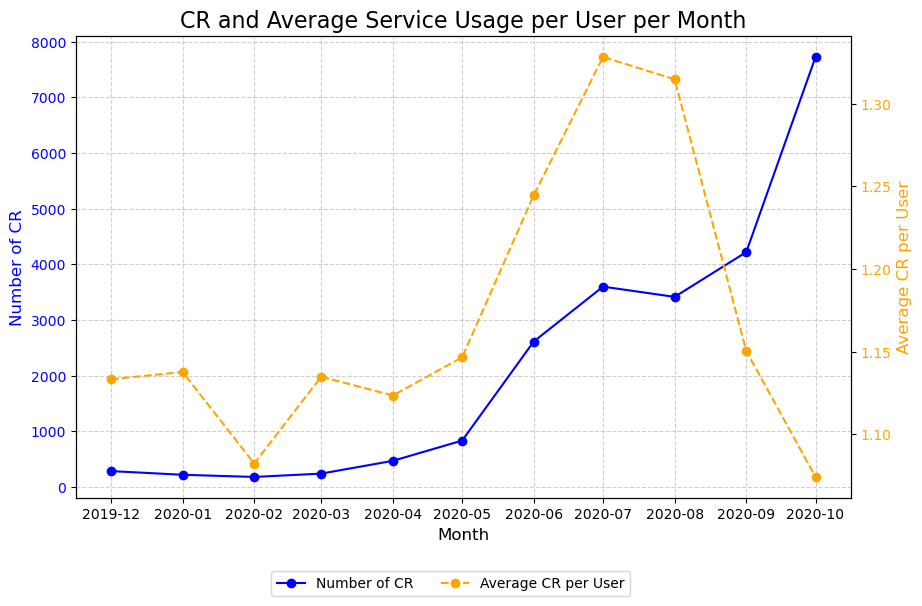

In [241]:
import matplotlib.pyplot as plt

# Create a graph with to axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# represent total usage per month as number of cr per month 
ax1.plot(filtered_monthly_service_usage['CR_creation_month'], filtered_monthly_service_usage['CR_id_count'], 
         label='Number of CR', marker='o', linestyle='-', color='blue')
ax1.set_xlabel('Month', fontsize=12)
ax1.set_ylabel('Number of CR', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True, linestyle='--', alpha=0.6)

# Second axis to show average CR number per user per month
ax2 = ax1.twinx()
ax2.plot(filtered_average_service_usage['CR_creation_month'], filtered_average_service_usage['Average_CR_usage_per_user'], 
         label='Average CR per User', marker='o', linestyle='--', color='orange')
ax2.set_ylabel('Average CR per User', color='orange', fontsize=12)
ax2.tick_params(axis='y', labelcolor='orange')

# adjust legend position
fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0), fontsize=10, ncol=2)

# add tittle
plt.title('CR and Average Service Usage per User per Month', fontsize=16)

# show it!
plt.show()



In [242]:
users_per_month_df = merged_df.copy()

users_per_month_df = users_per_month_df.groupby('CR_creation_month')['CR_user_id'].nunique().reset_index()

users_per_month_df = users_per_month_df[1:-1] #we get rid of first and last month 

users_per_month_df = users_per_month_df.reset_index(drop=True)

users_per_month_df

,CR_creation_month,CR_user_id
0,2019-12,205
1,2020-01,159
2,2020-02,147
3,2020-03,183
4,2020-04,369
5,2020-05,636
6,2020-06,1835
7,2020-07,2418
8,2020-08,2384
9,2020-09,3323


In [243]:
import matplotlib.pyplot as plt

# Ensure CR_creation_month is in a compatible format
users_per_month_df['CR_creation_month'] = users_per_month_df['CR_creation_month'].dt.to_timestamp()





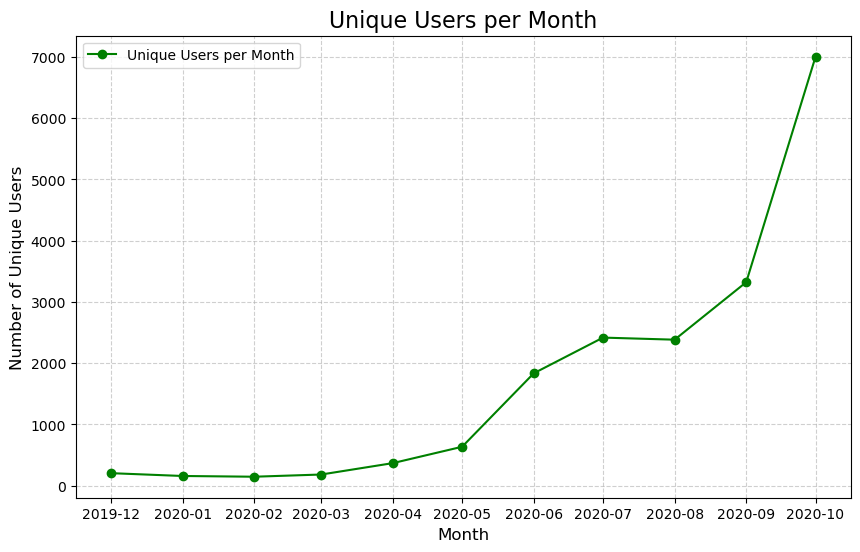

In [244]:
# Plot the number of unique users per month
plt.figure(figsize=(10, 6))
plt.plot(users_per_month_df['CR_creation_month'], users_per_month_df['CR_user_id'], 
         marker='o', linestyle='-', color='green', label='Unique Users per Month')

# Add labels, title, and legend
plt.title('Unique Users per Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Unique Users', fontsize=12)
#plt.xticks(rotation=45)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Show the plot
plt.show()

<span style="font-size:22px;">Incident Rate</span>

,month,Count,Incident_type
0,2020-10,48,Declined_transactions


,month,Count,Incident_type
0,2019-12,24,Failed_direct_debit
1,2020-01,9,Failed_direct_debit
2,2020-02,10,Failed_direct_debit
3,2020-03,3,Failed_direct_debit
4,2020-04,14,Failed_direct_debit


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\4242295148.py:31: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\4242295148.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')


,month,Count,Incident_type
0,2019-12,110,Rejected_CR
1,2020-01,112,Rejected_CR
2,2020-02,72,Rejected_CR
3,2020-03,75,Rejected_CR
4,2020-04,150,Rejected_CR


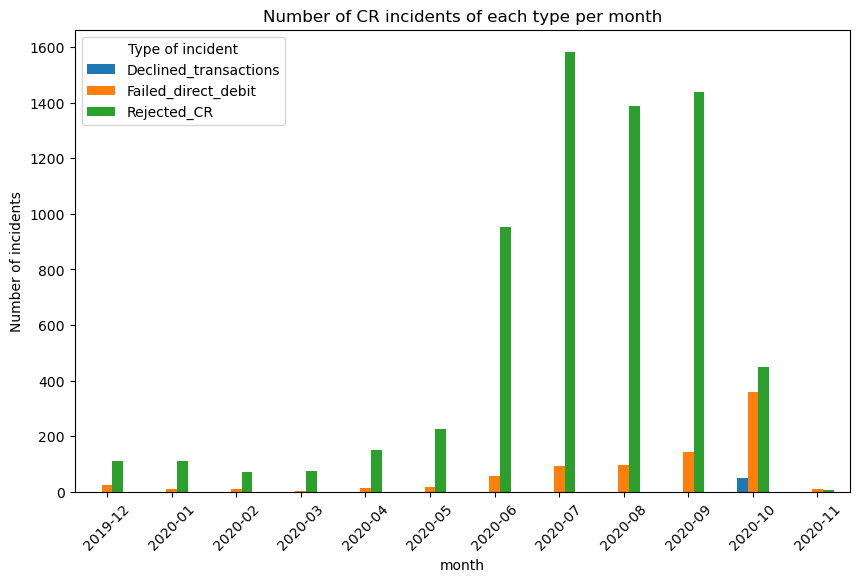

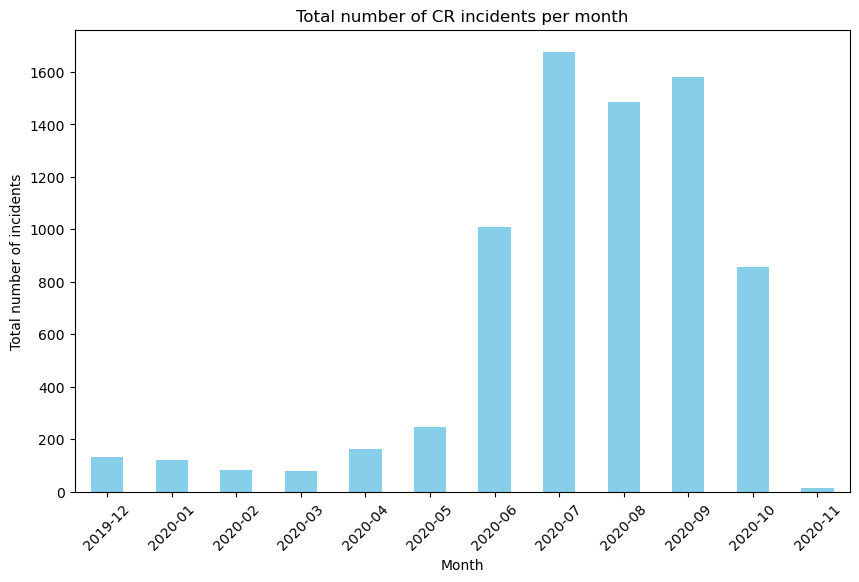

In [245]:
#CR incident rate

#lets define datasets with possible incidents in payments (cash requests or fees payments)

declined_transactions = merged_df[(merged_df['CR_status']=='transaction_declined')] #failed to send funds to the customer, the fee could confirmed, accepted or cancelled thought
#display(declined_transactions['F_status'].unique())


failed_direct_debit = merged_df[(merged_df['CR_status']=='direct_debit_rejected')] #failed to charge the customer, the fee could be confirmed, accepted or cancelled 
#display(declined_transactions['F_status'].unique())

failed_rejected_CRs = merged_df[(merged_df['CR_status']=='rejected')] #failed to charge the fee, cash request could be active, direct debit rejected, direct debit sent, money back or canceled
#display(failed_fee_charges['CR_status'].unique())

#lets calculate the declined transaction rate and also to plot it for each month 

declined_transactions_rate = declined_transactions.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
declined_transactions_rate.rename(columns={'CR_creation_month':'month','CR_id': 'Count'}, inplace=True)
declined_transactions_rate['Incident_type'] = 'Declined_transactions'
display(declined_transactions_rate.head())

failed_direct_debit_rate = failed_direct_debit.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
failed_direct_debit_rate.rename(columns={'CR_creation_month':'month','CR_id': 'Count'}, inplace=True)
failed_direct_debit_rate['Incident_type'] = 'Failed_direct_debit'
display(failed_direct_debit_rate.head())


#we change the datatype so we can represent it on x axis

#lets create a new column called CR_creation_date to get just the date and ease filtering later
failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')
rejected_CR_rate = failed_rejected_CRs.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
rejected_CR_rate.rename(columns={'CR_creation_month':'month','CR_id': 'Count'}, inplace=True)
rejected_CR_rate['Incident_type'] = 'Rejected_CR'
display(rejected_CR_rate.head())

incidents_per_month = pd.concat([declined_transactions_rate,failed_direct_debit_rate, rejected_CR_rate])
incidents_per_month = incidents_per_month.sort_values(by='month')

# Número de incidentes por mes para cada tipo de incidente
pivot_table = incidents_per_month.pivot_table(index='month', columns='Incident_type', values='Count', aggfunc='sum')
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Number of CR incidents of each type per month')
plt.xlabel('month')
plt.ylabel('Number of incidents')
plt.legend(title='Type of incident')
plt.xticks(rotation=45)
plt.show()

# Número total de incidentes por mes
df_monthly_totals = incidents_per_month.groupby('month')['Count'].sum()
df_monthly_totals.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total number of CR incidents per month')
plt.xlabel('Month')
plt.ylabel('Total number of incidents')
plt.xticks(rotation=45)
plt.show()






C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\1995986664.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\1995986664.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')


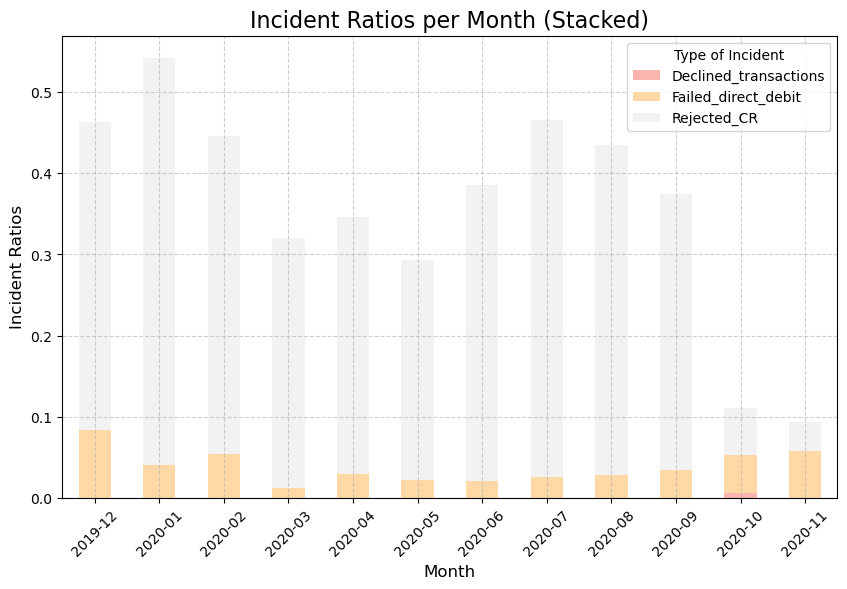

In [246]:
# total CR per month
total_cr_per_month = merged_df.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
total_cr_per_month.rename(columns={'CR_creation_month': 'month', 'CR_id': 'Total_CR_count'}, inplace=True)


# Declined Transactions
declined_transactions_rate = declined_transactions.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
declined_transactions_rate.rename(columns={'CR_creation_month': 'month', 'CR_id': 'Count'}, inplace=True)
declined_transactions_rate = pd.merge(declined_transactions_rate, total_cr_per_month, on='month')
declined_transactions_rate['Incident_ratio'] = declined_transactions_rate['Count'] / declined_transactions_rate['Total_CR_count']
declined_transactions_rate['Incident_type'] = 'Declined_transactions'

# Failed Direct Debit
failed_direct_debit_rate = failed_direct_debit.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
failed_direct_debit_rate.rename(columns={'CR_creation_month': 'month', 'CR_id': 'Count'}, inplace=True)
failed_direct_debit_rate = pd.merge(failed_direct_debit_rate, total_cr_per_month, on='month')
failed_direct_debit_rate['Incident_ratio'] = failed_direct_debit_rate['Count'] / failed_direct_debit_rate['Total_CR_count']
failed_direct_debit_rate['Incident_type'] = 'Failed_direct_debit'

# Rejected CRs
failed_rejected_CRs['CR_creation_month'] = failed_rejected_CRs['CR_created_at'].dt.to_period('M')
rejected_CR_rate = failed_rejected_CRs.groupby(['CR_creation_month'])['CR_id'].nunique().reset_index()
rejected_CR_rate.rename(columns={'CR_creation_month': 'month', 'CR_id': 'Count'}, inplace=True)
rejected_CR_rate = pd.merge(rejected_CR_rate, total_cr_per_month, on='month')
rejected_CR_rate['Incident_ratio'] = rejected_CR_rate['Count'] / rejected_CR_rate['Total_CR_count']
rejected_CR_rate['Incident_type'] = 'Rejected_CR'

# Concatenate all df
incidents_per_month = pd.concat([declined_transactions_rate, failed_direct_debit_rate, rejected_CR_rate])

pivot_table_ratios = incidents_per_month.pivot_table(index='month', columns='Incident_type', values='Incident_ratio', aggfunc='sum')

# Pile graph
pivot_table_ratios.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Pastel1')
plt.title('Incident Ratios per Month (Stacked)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Incident Ratios', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type of Incident')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\3689595335.py:10: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_fees_df['F_creation_month'] = filtered_fees_df['F_created_at'].dt.to_period('M')


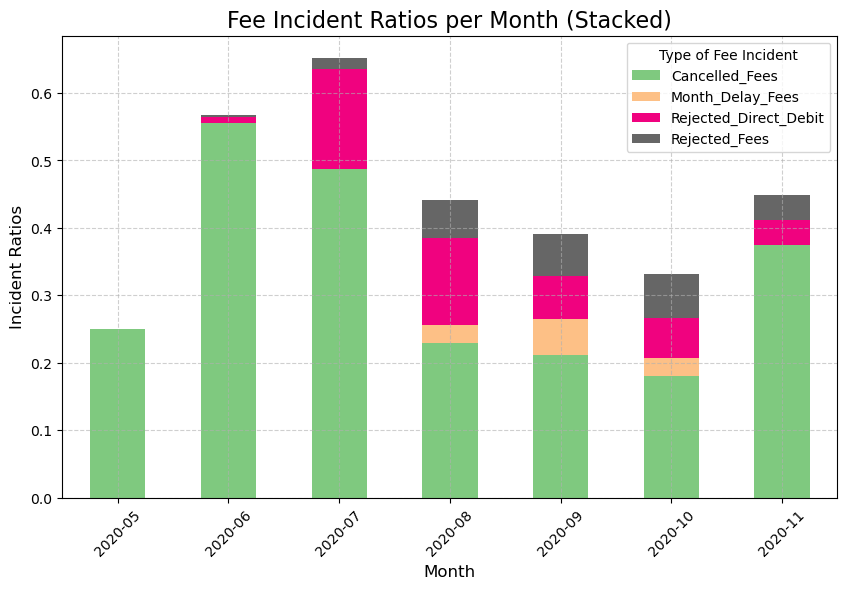

In [247]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's remove rows where F_created_at is null
filtered_fees_df = merged_df.copy() #[merged_df['F_created_at'].isnull()]

filtered_fees_df['F_created_at'] = pd.to_datetime(filtered_fees_df['F_created_at'], errors = 'coerce')

# Create month column for fees too
filtered_fees_df['F_creation_month'] = filtered_fees_df['F_created_at'].dt.to_period('M')

# Calculate number of fees per month
total_fees_per_month = filtered_fees_df.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
total_fees_per_month.rename(columns={'F_creation_month': 'month', 'F_id': 'Total_Fees_count'}, inplace=True)

# Analyze incident by status 
# Rejected Fees
rejected_fees = filtered_fees_df[filtered_fees_df['F_status'] == 'rejected']
rejected_fees_rate = rejected_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
rejected_fees_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
rejected_fees_rate = pd.merge(rejected_fees_rate, total_fees_per_month, on='month')
rejected_fees_rate['Incident_ratio'] = rejected_fees_rate['Count'] / rejected_fees_rate['Total_Fees_count']
rejected_fees_rate['Incident_type'] = 'Rejected_Fees'

# Cancelled Fees
cancelled_fees = filtered_fees_df[filtered_fees_df['F_status'] == 'cancelled']
cancelled_fees_rate = cancelled_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
cancelled_fees_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
cancelled_fees_rate = pd.merge(cancelled_fees_rate, total_fees_per_month, on='month')
cancelled_fees_rate['Incident_ratio'] = cancelled_fees_rate['Count'] / cancelled_fees_rate['Total_Fees_count']
cancelled_fees_rate['Incident_type'] = 'Cancelled_Fees'

# Analyze for category too
# Category: rejected_direct_debit
rejected_direct_debit = filtered_fees_df[filtered_fees_df['F_category'] == 'rejected_direct_debit']
rejected_direct_debit_rate = rejected_direct_debit.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
rejected_direct_debit_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
rejected_direct_debit_rate = pd.merge(rejected_direct_debit_rate, total_fees_per_month, on='month')
rejected_direct_debit_rate['Incident_ratio'] = rejected_direct_debit_rate['Count'] / rejected_direct_debit_rate['Total_Fees_count']
rejected_direct_debit_rate['Incident_type'] = 'Rejected_Direct_Debit'

# Category: month_delay_on_payment
month_delay_fees = filtered_fees_df[filtered_fees_df['F_category'] == 'month_delay_on_payment']
month_delay_fees_rate = month_delay_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
month_delay_fees_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
month_delay_fees_rate = pd.merge(month_delay_fees_rate, total_fees_per_month, on='month')
month_delay_fees_rate['Incident_ratio'] = month_delay_fees_rate['Count'] / month_delay_fees_rate['Total_Fees_count']
month_delay_fees_rate['Incident_type'] = 'Month_Delay_Fees'

# Combine all in one dataframe
fees_incidents_per_month = pd.concat([rejected_fees_rate, cancelled_fees_rate, rejected_direct_debit_rate, month_delay_fees_rate])

# Pivoting for ratios
pivot_table_fees_ratios = fees_incidents_per_month.pivot_table(index='month', columns='Incident_type', values='Incident_ratio', aggfunc='sum')

# Step 8: Plot stacked bar chart for fee incidents
pivot_table_fees_ratios.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Accent')
plt.title('Fee Incident Ratios per Month (Stacked)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Incident Ratios', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Type of Fee Incident', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()



C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\3230135380.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  filtered_fees_df['F_creation_month'] = filtered_fees_df['F_created_at'].dt.to_period('M')


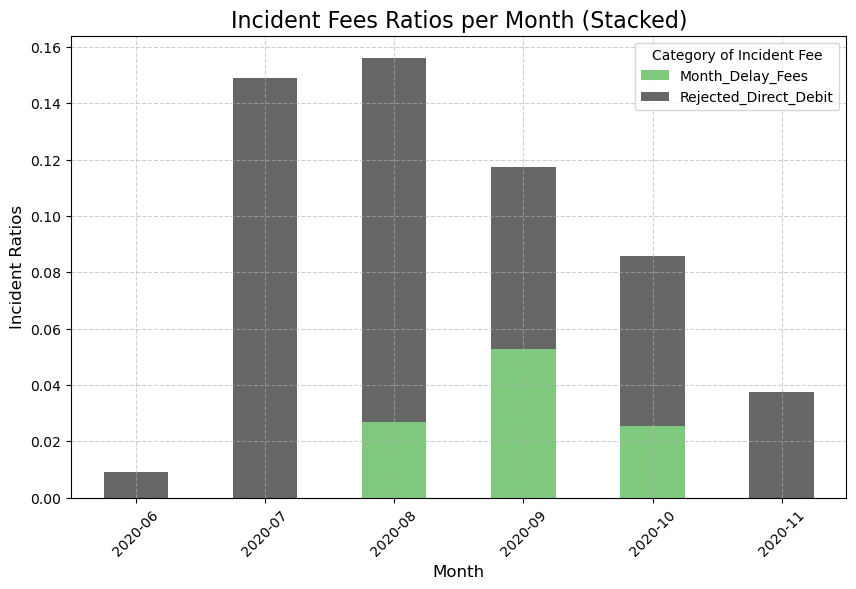

In [248]:
import pandas as pd
import matplotlib.pyplot as plt

# Paso 1: Eliminar filas con F_created_at nulo y crear F_creation_month
filtered_fees_df = merged_df.copy()
filtered_fees_df['F_created_at'] = pd.to_datetime(filtered_fees_df['F_created_at'])
filtered_fees_df['F_creation_month'] = filtered_fees_df['F_created_at'].dt.to_period('M')

# Paso 2: Calcular el total de tarifas creadas por mes
total_fees_per_month = filtered_fees_df.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
total_fees_per_month.rename(columns={'F_creation_month': 'month', 'F_id': 'Total_Fees_count'}, inplace=True)

# Paso 3: Filtrar tarifas de tipo "incident"
incident_fees = filtered_fees_df[filtered_fees_df['F_type'] == 'incident']

# Categoría: rejected_direct_debit
rejected_direct_debit_fees = incident_fees[incident_fees['F_category'] == 'rejected_direct_debit']
rejected_direct_debit_rate = rejected_direct_debit_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
rejected_direct_debit_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
rejected_direct_debit_rate = pd.merge(rejected_direct_debit_rate, total_fees_per_month, on='month')
rejected_direct_debit_rate['Incident_ratio'] = rejected_direct_debit_rate['Count'] / rejected_direct_debit_rate['Total_Fees_count']
rejected_direct_debit_rate['Incident_type'] = 'Rejected_Direct_Debit'

# Categoría: month_delay_on_payment
month_delay_fees = incident_fees[incident_fees['F_category'] == 'month_delay_on_payment']
month_delay_fees_rate = month_delay_fees.groupby(['F_creation_month'])['F_id'].nunique().reset_index()
month_delay_fees_rate.rename(columns={'F_creation_month': 'month', 'F_id': 'Count'}, inplace=True)
month_delay_fees_rate = pd.merge(month_delay_fees_rate, total_fees_per_month, on='month')
month_delay_fees_rate['Incident_ratio'] = month_delay_fees_rate['Count'] / month_delay_fees_rate['Total_Fees_count']
month_delay_fees_rate['Incident_type'] = 'Month_Delay_Fees'

# Combinar ambas categorías
incident_categories_per_month = pd.concat([rejected_direct_debit_rate, month_delay_fees_rate])

# Crear tabla pivote para los ratios
pivot_table_incident_categories = incident_categories_per_month.pivot_table(index='month', columns='Incident_type', values='Incident_ratio', aggfunc='sum')

# Gráfico apilado para mostrar ambas categorías dentro de "incident"
pivot_table_incident_categories.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Accent')
plt.title('Incident Fees Ratios per Month (Stacked)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Incident Ratios', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Category of Incident Fee', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




<span style="font-size:22px;">Revenue</span>

C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\922129154.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revenue_data_f['F_created_at'] = pd.to_datetime(revenue_data_f['F_created_at'])
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\922129154.py:6: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  revenue_data_f['F_creation_month'] = revenue_data_f['F_created_at'].dt.to_period('M')
C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\922129154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

,F_creation_month,F_total_amount
0,2020-05,60.0
1,2020-06,1700.0
2,2020-07,4020.0
3,2020-08,10900.0
4,2020-09,16540.0
5,2020-10,40210.0
6,2020-11,780.0


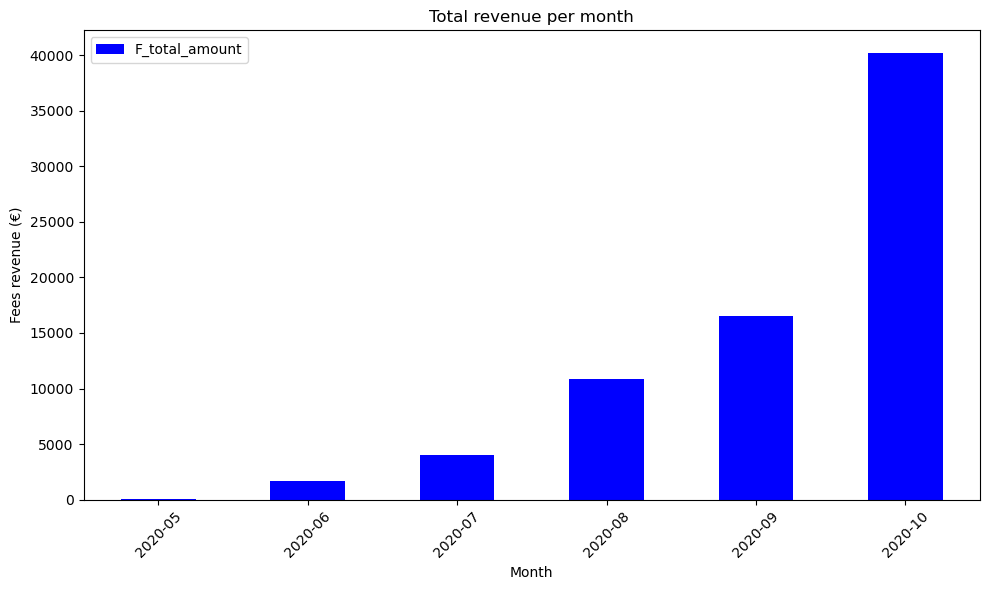

In [249]:
revenue_data = merged_df.copy()

revenue_data_f = revenue_data[revenue_data['F_status']=='accepted']

revenue_data_f['F_created_at'] = pd.to_datetime(revenue_data_f['F_created_at'])
revenue_data_f['F_creation_month'] = revenue_data_f['F_created_at'].dt.to_period('M')

revenue_per_month = revenue_data_f.groupby('F_creation_month').agg({'F_total_amount':'sum'}).reset_index()

display(revenue_per_month)

revenue_per_month = revenue_per_month.iloc[:-1]  #we remove last row cause last month could be incomplete

# Plot with proper x-axis labels
revenue_per_month.plot(
    x='F_creation_month',  # Specify the column for the x-axis
    y='F_total_amount',  # Specify the column for the y-axis
    kind='bar', 
    figsize=(10, 6), 
    color='blue'
)
plt.title('Total revenue per month')
plt.xlabel('Month')
plt.ylabel('Fees revenue (€)')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to avoid overlapping
plt.show()



<span style="font-size:22px;">Other Metrics Usage</span>

In [250]:
#let's start from the merged_df that we saved

import pandas as pd

#we load we saved
data = pd.read_csv("merged.csv")

# Drop duplicate CRs keeping the first occurrence, for example, it does not mind for this
data = data.drop_duplicates(subset='CR_id', keep='first')

# Convert CR_created_at to datetime format and extract the month and year
data['CR_created_at'] = pd.to_datetime(data['CR_created_at'])
data['YearMonth'] = data['CR_created_at'].dt.to_period('M')  # Format as 'Year-Month'

# Filter rows with payment incidents (non-null recovery statuses)
incident_data = data[(data['CR_recovery_status'].notnull()) & (data['CR_recovery_status']!= "cancelled")]

# Group by Year-Month and CR_recovery_status, then count occurrences
monthly_CR_incidents = incident_data.groupby(['YearMonth', 'CR_recovery_status']).size().reset_index(name='IncidentCount')

display(monthly_CR_incidents)


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\1964377700.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data['CR_created_at'].dt.to_period('M')  # Format as 'Year-Month'


,YearMonth,CR_recovery_status,IncidentCount
0,2019-12,completed,14
1,2019-12,pending,24
2,2019-12,pending_direct_debit,1
3,2020-01,completed,24
4,2020-01,pending,9
5,2020-02,completed,6
6,2020-02,pending,10
7,2020-03,completed,15
8,2020-03,pending,2
9,2020-03,pending_direct_debit,1


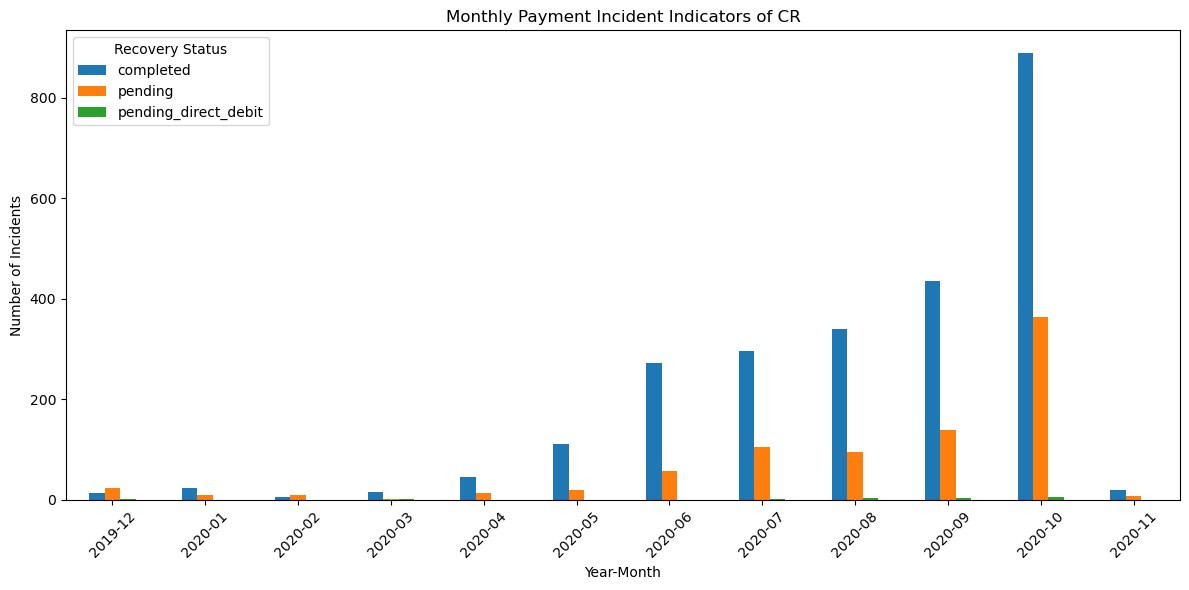

In [251]:
# Pivot the table to prepare for plotting
pivot_data = monthly_CR_incidents.pivot(index='YearMonth', columns='CR_recovery_status', values='IncidentCount').fillna(0)

# Plot separate counts for each CR_recovery_status
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 6))

# Customize the chart
plt.title("Monthly Payment Incident Indicators of CR")
plt.xlabel("Year-Month")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.legend(title="Recovery Status")
plt.tight_layout()

# Show the plot
plt.show()


In [252]:
merged_df[merged_df["CR_status"] == "transaction_declined"].sort_values(by="CR_id").head()

,CR_id,CR_amount,CR_status,CR_created_at,CR_updated_at,CR_user_id,CR_moderated_at,CR_deleted_account_id,CR_reimbursement_date,CR_cash_request_received_date,...,F_total_amount,F_reason,F_created_at,F_updated_at,F_paid_at,F_from_date,F_to_date,F_charge_moment,CR_creation_date,CR_creation_month
8664,19459,50.0,transaction_declined,2020-10-06 14:19:49.806650+00:00,2020-10-14 09:02:34.931443+00,47557.0,NaN,NaN,2020-11-05 22:00:00+00,NaN,...,5.0,Instant Payment Cash Request 19459,2020-10-06 14:20:12.722276+00,2020-10-13 14:25:05.719271+00,NaN,NaN,NaN,after,2020-10-06,2020-10
9048,19780,100.0,transaction_declined,2020-10-08 06:47:43.077616+00:00,2020-10-08 06:48:54.433357+00,62880.0,NaN,NaN,2020-10-31 23:51:00+00,NaN,...,5.0,Instant Payment Cash Request 19780,2020-10-08 06:48:02.357279+00,2020-10-13 14:25:14.171547+00,NaN,NaN,NaN,after,2020-10-08,2020-10
9204,20251,50.0,transaction_declined,2020-10-10 04:37:42.678525+00:00,2020-10-12 16:51:51.078778+00,14832.0,NaN,NaN,2020-10-25 04:37:36.748+00,NaN,...,5.0,Instant Payment Cash Request 20251,2020-10-12 16:51:38.93779+00,2020-10-13 14:25:18.916469+00,NaN,NaN,NaN,after,2020-10-10,2020-10
9213,20282,95.0,transaction_declined,2020-10-10 08:00:42.061358+00:00,2020-10-10 08:27:14.65316+00,62880.0,NaN,NaN,2020-10-31 23:51:00+00,NaN,...,5.0,Instant Payment Cash Request 20282,2020-10-10 08:01:11.664719+00,2020-10-13 14:25:18.00263+00,NaN,NaN,NaN,after,2020-10-10,2020-10
9212,20290,100.0,transaction_declined,2020-10-10 08:27:39.342243+00:00,2020-10-10 08:28:09.00029+00,62880.0,NaN,NaN,2020-10-31 23:51:00+00,NaN,...,5.0,Instant Payment Cash Request 20290,2020-10-10 08:27:51.341606+00,2020-10-13 14:25:18.497305+00,NaN,NaN,NaN,after,2020-10-10,2020-10


In [253]:
#we noticed some not expected value on the recovery_status column as cancelled. it should be null as transaction is declined

#we load we saved
data = pd.read_csv("merged.csv")

# Drop duplicate CRs keeping the first occurrence, for example, it does not mind for this
data = data.drop_duplicates(subset='CR_id', keep='first')

# Convert CR_created_at to datetime format and extract the month and year
data['CR_created_at'] = pd.to_datetime(data['CR_created_at'])
data['YearMonth'] = data['CR_created_at'].dt.to_period('M')  # Format as 'Year-Month'

# Get valid months by excluding the first and last month
valid_months = data['YearMonth'].unique()[1:-1]

# Filter the data to exclude the first and last month
data = data[data['YearMonth'].isin(valid_months)]

# Filter rows with payment incidents (non-null recovery statuses)
incident_data = data[(data['CR_recovery_status'].notnull()) & (data['CR_recovery_status']!= "cancelled") & (data['CR_recovery_status']!= "completed")]

# Group by Year-Month and CR_recovery_status, then count occurrences
monthly_CR_incidents = incident_data.groupby(['YearMonth', 'CR_recovery_status']).size().reset_index(name='IncidentCount')

display(monthly_CR_incidents)


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\4052349239.py:11: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data['CR_created_at'].dt.to_period('M')  # Format as 'Year-Month'


,YearMonth,CR_recovery_status,IncidentCount
0,2020-01,pending,9
1,2020-02,pending,10
2,2020-03,pending,2
3,2020-03,pending_direct_debit,1
4,2020-04,pending,14
5,2020-05,pending,19
6,2020-06,pending,57
7,2020-07,pending,104
8,2020-07,pending_direct_debit,1
9,2020-08,pending,95


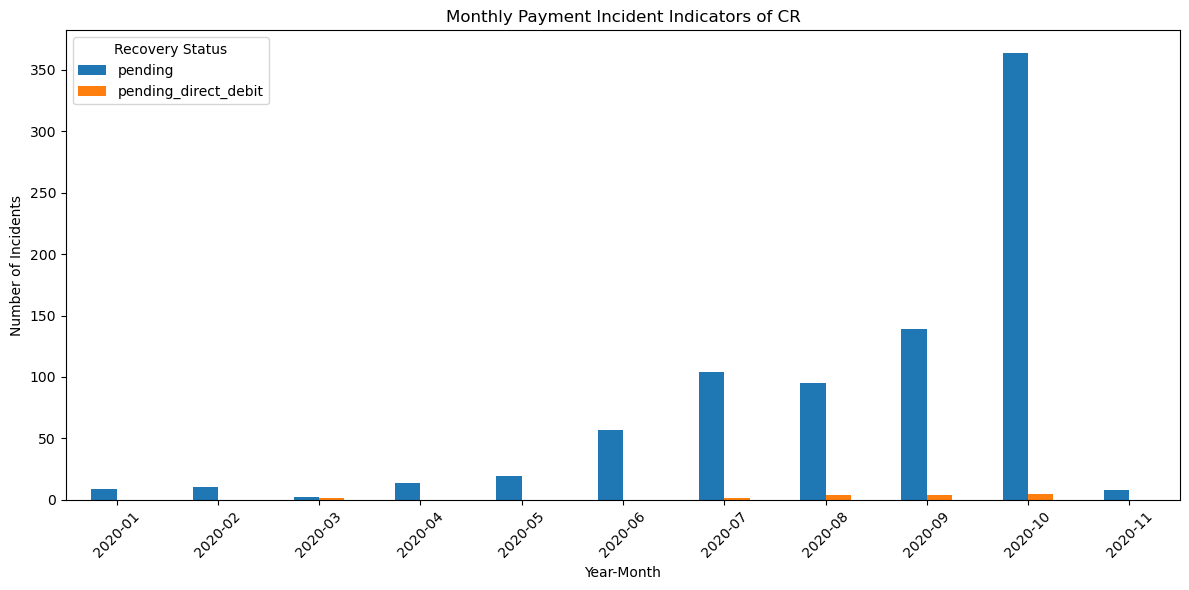

In [254]:
# Pivot the table to prepare for plotting
pivot_data = monthly_CR_incidents.pivot(index='YearMonth', columns='CR_recovery_status', values='IncidentCount').fillna(0)

# Plot separate counts for each CR_recovery_status
pivot_data.plot(kind='bar', stacked=False, figsize=(12, 6))

# Customize the chart
plt.title("Monthly Payment Incident Indicators of CR")
plt.xlabel("Year-Month")
plt.ylabel("Number of Incidents")
plt.xticks(rotation=45)
plt.legend(title="Recovery Status")
plt.tight_layout()

# Show the plot
plt.show()

In [255]:
#ok but that is the overall, we want to check the rate.

import pandas as pd

# Load your dataset
data = pd.read_csv("merged.csv")

# Drop duplicate CR_id entries
data = data.drop_duplicates(subset='CR_id', keep='first')

# Convert CR_created_at to datetime format and extract the month and year
data['CR_created_at'] = pd.to_datetime(data['CR_created_at'])
data['YearMonth'] = data['CR_created_at'].dt.to_period('M')

# Filter rows with payment incidents
incident_data = data[data['CR_recovery_status'].notnull()]

# Group by YearMonth and CR_recovery_status, then count occurrences
monthly_indicators = (incident_data.groupby(['YearMonth', 'CR_recovery_status']).size().reset_index(name='IncidentCount')
)

# Calculate the total number of unique CR_id for each month
total_requests_per_month = (data.groupby('YearMonth')['CR_id'].nunique().reset_index(name='TotalRequests'))

# Merge the total requests with the incident data
incident_rates = pd.merge(monthly_indicators, total_requests_per_month, on='YearMonth')

# Calculate the incident rate
incident_rates['IncidentRate'] = incident_rates['IncidentCount'] / incident_rates['TotalRequests'] *100 #in percentage

display(incident_rates)


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\2558989198.py:13: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data['CR_created_at'].dt.to_period('M')


,YearMonth,CR_recovery_status,IncidentCount,TotalRequests,IncidentRate
0,2019-12,completed,14,289,4.844291
1,2019-12,pending,24,289,8.304498
2,2019-12,pending_direct_debit,1,289,0.346021
3,2020-01,completed,24,223,10.762332
4,2020-01,pending,9,223,4.035874
5,2020-02,completed,6,184,3.260870
6,2020-02,pending,10,184,5.434783
7,2020-03,completed,15,244,6.147541
8,2020-03,pending,2,244,0.819672
9,2020-03,pending_direct_debit,1,244,0.409836


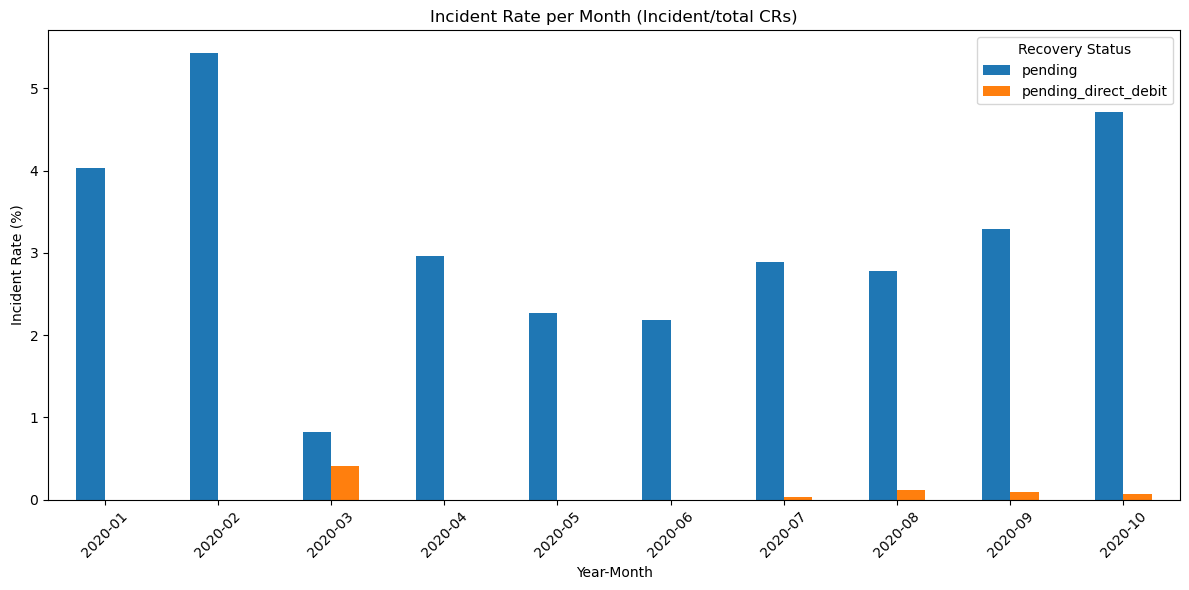

In [345]:
#let's plot this considering also removing first and last month

# Filter out the first and last month
valid_months = incident_rates['YearMonth'].unique()[1:-1]
filtered_data = incident_rates[incident_rates['YearMonth'].isin(valid_months)]
# Exclude 'cancelled' recovery status
filtered_data = filtered_data[(filtered_data['CR_recovery_status'] != 'cancelled') & (filtered_data['CR_recovery_status']!= "completed")]

# Pivot data for plotting
pivot_data = filtered_data.pivot(index='YearMonth', columns='CR_recovery_status', values='IncidentRate').fillna(0)

# Plot the incident rate as a line graph
pivot_data.plot(kind='bar', figsize=(12, 6))

# Customize the chart
plt.title("Incident Rate per Month (Incident/total CRs)")
plt.xlabel("Year-Month")
plt.ylabel("Incident Rate (%)")
plt.xticks(rotation=45)
plt.legend(title="Recovery Status")
plt.tight_layout()

# Show the plot
plt.show()

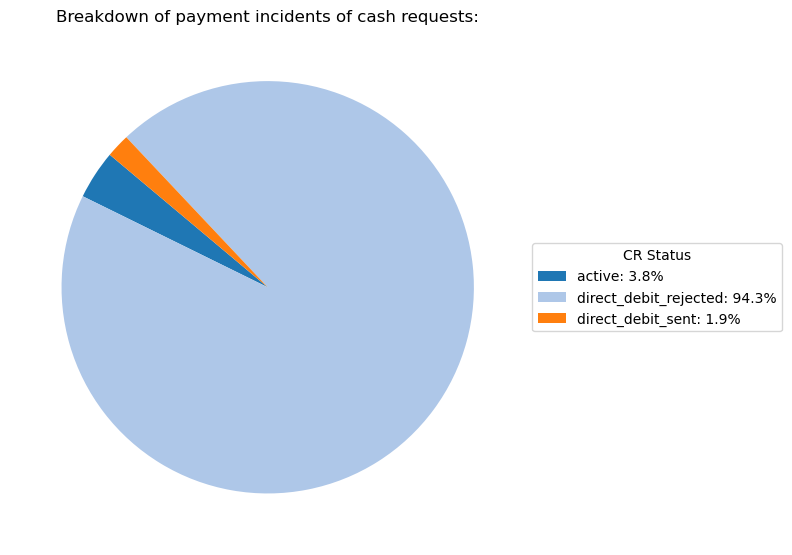

In [257]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("merged.csv")

# Drop duplicate CR_id entries
data = data.drop_duplicates(subset='CR_id', keep='first')

# Filter rows where CR_recovery_status is pending or pending_direct_debit
filtered_data = data[data['CR_recovery_status'].isin(['pending', 'pending_direct_debit'])]

# Count unique CR_id by CR_status
status_counts = filtered_data.groupby('CR_status')['CR_id'].nunique()

# Calculate percentages for each CR_status
total_cr_ids = status_counts.sum()
status_percentages = (status_counts / total_cr_ids) * 100

# Generate the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
wedges, texts = ax.pie(
    status_percentages, 
    startangle=140, 
    colors=colors, 
    textprops={'fontsize': 10}
)

# Add a legend with labels and percentages
ax.legend(
    wedges, 
    [f"{label}: {percentage:.1f}%" for label, percentage in zip(status_counts.index, status_percentages)],
    title="CR Status",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# Add the title
ax.set_title(f"Breakdown of payment incidents of cash requests:", fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\3412156877.py:12: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  data['YearMonth'] = data['CR_created_at'].dt.to_period('M')


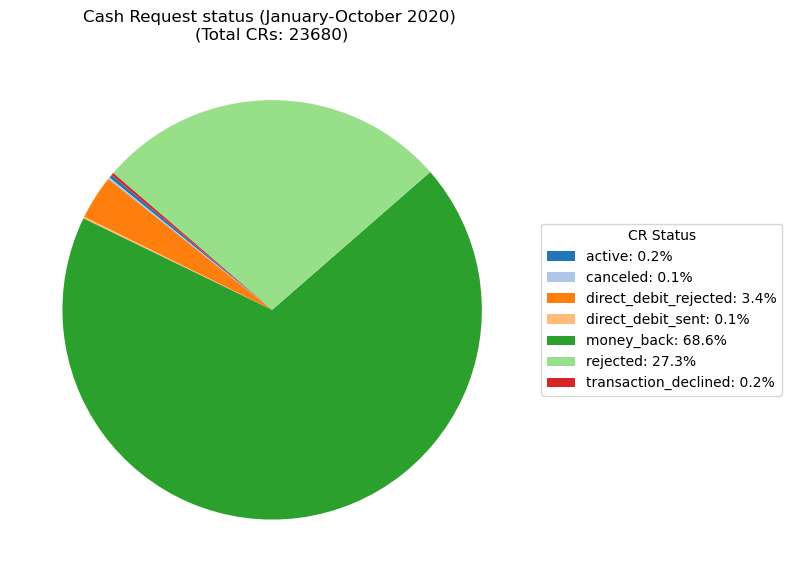

In [258]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv("merged.csv")

# Drop duplicate CR_id entries
data = data.drop_duplicates(subset='CR_id', keep='first')

# Convert CR_created_at to datetime format and extract year and month
data['CR_created_at'] = pd.to_datetime(data['CR_created_at'])
data['YearMonth'] = data['CR_created_at'].dt.to_period('M')

# Get valid months by excluding the first and last month
valid_months = data['YearMonth'].unique()[1:-1]

# Filter the data to exclude the first and last month
filtered_data = data[data['YearMonth'].isin(valid_months)]

# Count unique CR_id by CR_status
status_counts = filtered_data.groupby('CR_status')['CR_id'].nunique()

# Calculate percentages for each status
total_cr_ids = status_counts.sum()
status_percentages = (status_counts / total_cr_ids) * 100

# Generate the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
wedges, texts = ax.pie(
    status_percentages, 
    startangle=140, 
    colors=colors, 
    textprops={'fontsize': 10}
)

# Add a legend with labels and percentages
ax.legend(
    wedges, 
    [f"{label}: {percentage:.1f}%" for label, percentage in zip(status_counts.index, status_percentages)],
    title="CR Status",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# Add the title with the total CR count
ax.set_title(f"Cash Request status (January-October 2020) \n(Total CRs: {total_cr_ids})", fontsize=12)

# Show the chart
plt.tight_layout()
plt.show()


Reimbursement delay

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
fees_data = pd.read_csv("merged.csv")

fees_data = fees_data[fees_data['F_type']=='incident']

display(fees_data.head())

,Unnamed: 0,CR_id,CR_amount,CR_status,CR_created_at,CR_updated_at,CR_user_id,CR_moderated_at,CR_deleted_account_id,CR_reimbursement_date,...,F_status,F_category,F_total_amount,F_reason,F_created_at,F_updated_at,F_paid_at,F_from_date,F_to_date,F_charge_moment
145,145,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,...,cancelled,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-09-10 22:32:51.726321+00,2020-12-15 17:07:43.211171+00,NaN,NaN,NaN,after
146,146,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,...,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-08-11 22:27:55.370079+00,2020-10-13 14:25:05.431752+00,NaN,NaN,NaN,after
147,147,6098,100.0,active,2020-07-01 09:30:03.14541+00,2020-08-11 22:27:58.240406+00,23328.0,2020-07-01 16:44:53.070844+00,NaN,2020-08-03 22:00:00+00,...,rejected,month_delay_on_payment,5.0,month delay on payment - 9/2020,2020-10-10 23:26:31.48232+00,2020-10-13 14:25:03.371439+00,NaN,NaN,NaN,after
149,149,3611,100.0,direct_debit_rejected,2020-06-17 11:03:32.61712+00,2020-07-21 22:09:32.695508+00,15415.0,2020-06-17 14:52:56.14175+00,NaN,2020-07-17 11:03:52.469+00,...,rejected,rejected_direct_debit,5.0,rejected direct debit,2020-07-21 22:09:32.585036+00,2020-10-13 14:25:00.836605+00,NaN,NaN,NaN,after
150,150,3611,100.0,direct_debit_rejected,2020-06-17 11:03:32.61712+00,2020-07-21 22:09:32.695508+00,15415.0,2020-06-17 14:52:56.14175+00,NaN,2020-07-17 11:03:52.469+00,...,rejected,month_delay_on_payment,5.0,month delay on payment - 8/2020,2020-08-20 23:11:34.816736+00,2020-10-13 14:25:00.896352+00,NaN,NaN,NaN,after


F_category
month_delay_on_payment     597
rejected_direct_debit     1599
Name: count, dtype: int64

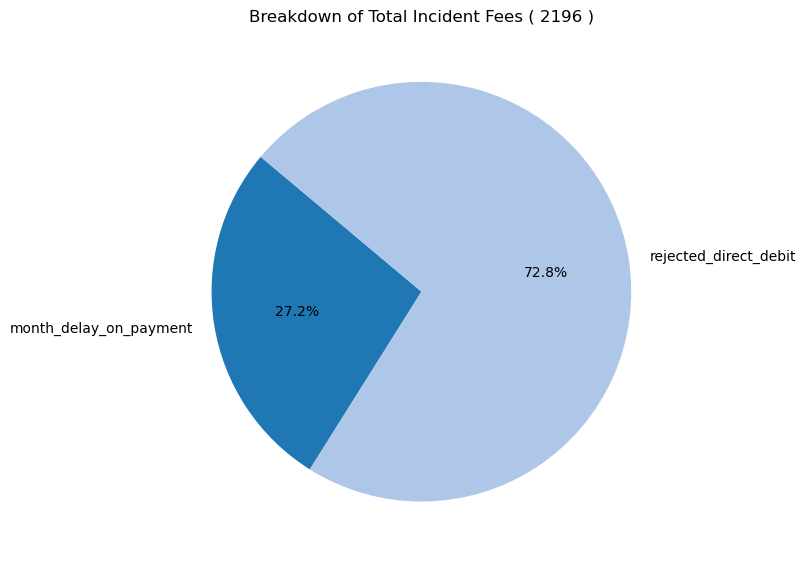

In [270]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
fees_data = pd.read_csv("merged.csv")

# Filter rows where F_type is 'incident'
fees_data = fees_data[fees_data['F_type'] == 'incident']

# Group by F_category and sum up F_total_amount
category_counts = fees_data.groupby('F_category')['F_category'].value_counts()

display(category_counts.head())

# Calculate percentages
total_fees = category_counts.sum()
category_percentages = (category_counts / total_fees) * 100

# Generate the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
wedges, texts, autotexts = ax.pie(
    category_percentages, 
    labels=category_percentages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    textprops={'fontsize': 10}
)

# Add a title
ax.set_title(f"Breakdown of Total Incident Fees ( {total_fees} )", fontsize=12)

# Improve layout
plt.tight_layout()
plt.show()


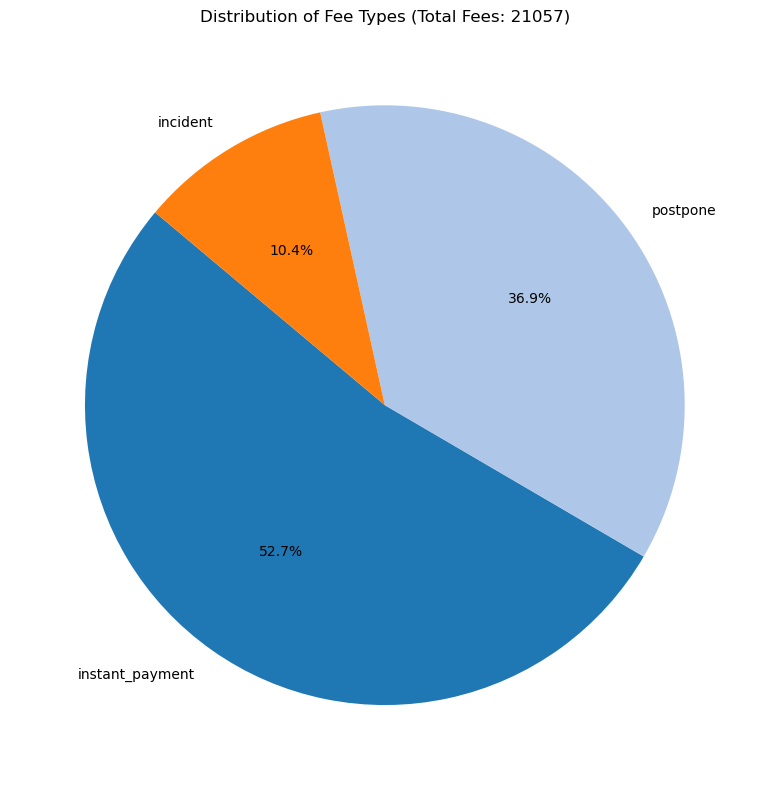

In [271]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
fees_data = pd.read_csv("merged.csv")

# Count occurrences of each F_type
type_counts = fees_data['F_type'].value_counts()

# Calculate percentages for each F_type
total_fees = type_counts.sum()
type_percentages = (type_counts / total_fees) * 100

# Generate the pie chart
fig, ax = plt.subplots(figsize=(8, 8))
colors = plt.cm.tab20.colors  # Use a colormap for distinct colors
wedges, texts, autotexts = ax.pie(
    type_percentages, 
    labels=type_percentages.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=colors, 
    textprops={'fontsize': 10}
)

# Add a title
ax.set_title(f"Distribution of Fee Types (Total Fees: {total_fees})", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()


In [293]:
time_analysis_df = pd.read_csv("merged.csv")

time_colums_payment_delay=time_analysis_df[["CR_id","CR_reimbursement_date", "CR_money_back_date"]]

print(time_colums_payment_delay.shape)
display(time_colums_payment_delay.sample(50).sort_values(by="CR_id"))

(32094, 3)


,CR_id,CR_reimbursement_date,CR_money_back_date
721,1614,2020-06-05 22:00:00+00,NaN
891,2023,2020-06-10 22:00:00+00,2020-06-11 23:53:00.591988+00
18564,2518,2020-08-11 22:00:00+00,2020-08-23 08:08:56.111694+00
12289,2641,2020-07-21 22:00:00+00,2020-07-21 22:00:00+00
12343,3680,2020-09-01 22:00:00+00,2020-09-01 22:00:00+00
12903,4189,2020-07-13 22:00:00+00,2020-07-14 22:00:00+00
2191,4609,2020-07-22 10:35:47.694+00,NaN
2684,5485,2020-07-05 22:00:00+00,NaN
3153,6608,2020-08-05 22:00:00+00,NaN
13655,7088,2020-08-05 22:00:00+00,2020-08-05 22:00:00+00


In [ ]:
# Drop duplicate CR_id entries
time_colums_payment_delay = time_colums_payment_delay.drop_duplicates(subset='CR_id', keep='first')
print(time_colums_payment_delay.shape)

#25343

(23970, 3)


In [295]:
from datetime import datetime

#we first remove null values from columns

# Eliminar filas con valores nulos en las columnas de fechas
time_colums_payment_delay = time_colums_payment_delay.dropna(subset=['CR_reimbursement_date', 'CR_money_back_date'])
print(time_colums_payment_delay.shape)

time_colums_payment_delay['CR_reimbursement_date'] = pd.to_datetime(time_colums_payment_delay['CR_reimbursement_date'], format = 'mixed', errors= 'coerce')
time_colums_payment_delay['CR_money_back_date'] = pd.to_datetime(time_colums_payment_delay['CR_money_back_date'], format = 'mixed', errors = 'coerce')





(16543, 3)


In [297]:
# Check for rows where conversion failed
problems = time_colums_payment_delay[(time_colums_payment_delay['CR_reimbursement_date'].isna()) | (time_colums_payment_delay['CR_money_back_date'].isna())]
display(problems)

,CR_id,CR_reimbursement_date,CR_money_back_date


In [305]:
#number of days of delay on payment
# Calcular el retraso en días
time_colums_payment_delay['PaymentDelay'] = (time_colums_payment_delay['CR_money_back_date'] - time_colums_payment_delay['CR_reimbursement_date']).dt.days

time_colums_payment_delay.sample(3)


,CR_id,CR_reimbursement_date,CR_money_back_date,PaymentDelay
25666,21119,2020-11-03 22:00:00+00:00,2020-11-02 16:03:25.542636+00:00,-2
21294,23431,2020-11-03 22:00:00+00:00,2020-11-02 22:21:31.411248+00:00,-1
17629,8378,2020-08-05 22:00:00+00:00,2020-08-05 22:00:00+00:00,0


In [307]:
time_colums_payment_delay["PaymentDelay"].describe()

count    16543.000000
mean         5.767334
std         18.511593
min        -69.000000
25%          0.000000
50%          0.000000
75%          5.000000
max        312.000000
Name: PaymentDelay, dtype: float64

In [347]:
# Just interested on positive values, if we get it before it is not a problem
time_colums_payment_delay = time_colums_payment_delay[time_colums_payment_delay['PaymentDelay'] > 0]

time_colums_payment_delay['Reimbursement_Month'] = time_colums_payment_delay['CR_reimbursement_date'].dt.month
time_colums_payment_delay['Reimbursement_Month_Formatted'] = time_colums_payment_delay['CR_reimbursement_date'].dt.strftime('%m-%Y')
retraso_por_mes = time_colums_payment_delay.groupby('Reimbursement_Month_Formatted')['PaymentDelay'].mean().reset_index()
display(retraso_por_mes)

,Reimbursement_Month_Formatted,PaymentDelay
0,01-2020,137.000000
1,01-2021,9.058824
2,02-2020,115.631579
3,02-2021,3.000000
4,03-2020,20.040000
5,04-2020,16.174528
6,05-2020,12.799492
7,06-2020,8.138564
8,07-2020,9.309437
9,08-2020,14.498274


C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\578651496.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(retraso_por_mes['PaymentDelay'], patch_artist=True, labels=['Payment Delay'])


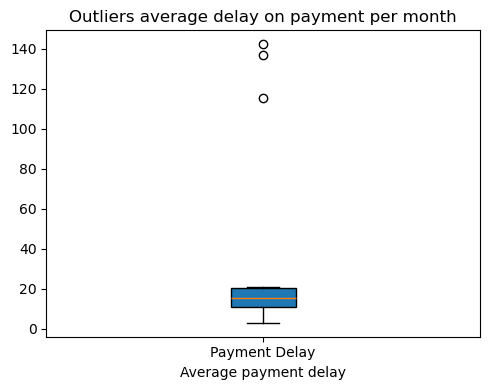

In [346]:
# Crear el box plot
plt.figure(figsize=(5, 4))
plt.boxplot(retraso_por_mes['PaymentDelay'], patch_artist=True, labels=['Payment Delay'])

# Personalizar el gráfico
plt.title("Outliers average delay on payment per month")
plt.xlabel("Average payment delay")
plt.tight_layout()

# Mostrar el gráfico
plt.show()

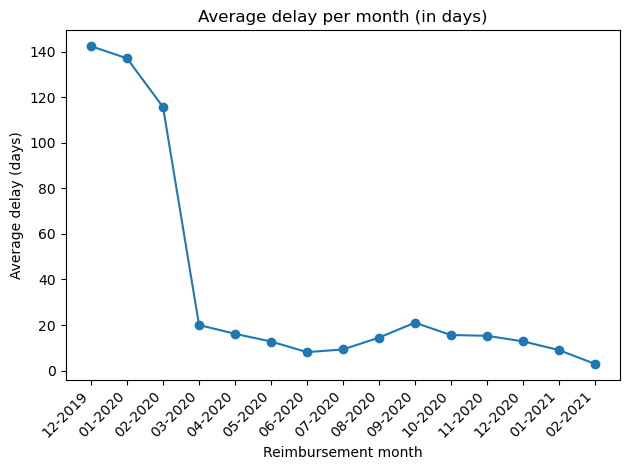

In [ ]:
# Sort by the original datetime column before plotting so we can order it
retraso_por_mes['Reimbursement_Month_DateTime'] = pd.to_datetime(retraso_por_mes['Reimbursement_Month_Formatted'], format='%m-%Y')
retraso_por_mes = retraso_por_mes.sort_values('Reimbursement_Month_DateTime')

# Plot the over time
import matplotlib.pyplot as plt

plt.plot(retraso_por_mes['Reimbursement_Month_Formatted'], retraso_por_mes['PaymentDelay'], marker='o')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.xlabel('Reimbursement month')
plt.ylabel('Average delay (days)')
plt.title('Average delay per month (in days)')
plt.tight_layout()
plt.show()


In [340]:
#we can to plot the fees to justify the outliers on the beginning
fees_reason = pd.read_csv("merged.csv")

fees_reason = fees_reason[(fees_reason["F_type"] == 'incident')|(fees_reason["F_type"] == 'postpone')]

fees_reason.isnull().sum()

#ok no null values in F_created_at

Unnamed: 0                          0
CR_id                               0
CR_amount                           0
CR_status                           0
CR_created_at                       0
CR_updated_at                       0
CR_user_id                        641
CR_moderated_at                  2494
CR_deleted_account_id            9321
CR_reimbursement_date               0
CR_cash_request_received_date     276
CR_money_back_date                828
CR_transfer_type                    0
CR_send_at                       3486
CR_recovery_status               5245
CR_reco_creation                 5245
CR_reco_last_update              5245
F_id                                0
F_type                              0
F_status                            0
F_category                       7766
F_total_amount                      0
F_reason                            0
F_created_at                        0
F_updated_at                        0
F_paid_at                        5429
F_from_date 

In [341]:
fees_reason['F_created_at'] = pd.to_datetime(fees_reason['F_created_at'], format = 'mixed', errors= 'coerce')

fees_reason.isnull().sum()

Unnamed: 0                          0
CR_id                               0
CR_amount                           0
CR_status                           0
CR_created_at                       0
CR_updated_at                       0
CR_user_id                        641
CR_moderated_at                  2494
CR_deleted_account_id            9321
CR_reimbursement_date               0
CR_cash_request_received_date     276
CR_money_back_date                828
CR_transfer_type                    0
CR_send_at                       3486
CR_recovery_status               5245
CR_reco_creation                 5245
CR_reco_last_update              5245
F_id                                0
F_type                              0
F_status                            0
F_category                       7766
F_total_amount                      0
F_reason                            0
F_created_at                        0
F_updated_at                        0
F_paid_at                        5429
F_from_date 

In [342]:
# Extract year-month from F_created_at
fees_reason['MonthYear'] = fees_reason['F_created_at'].dt.to_period('M')

C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\3970933175.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fees_reason['MonthYear'] = fees_reason['F_created_at'].dt.to_period('M')


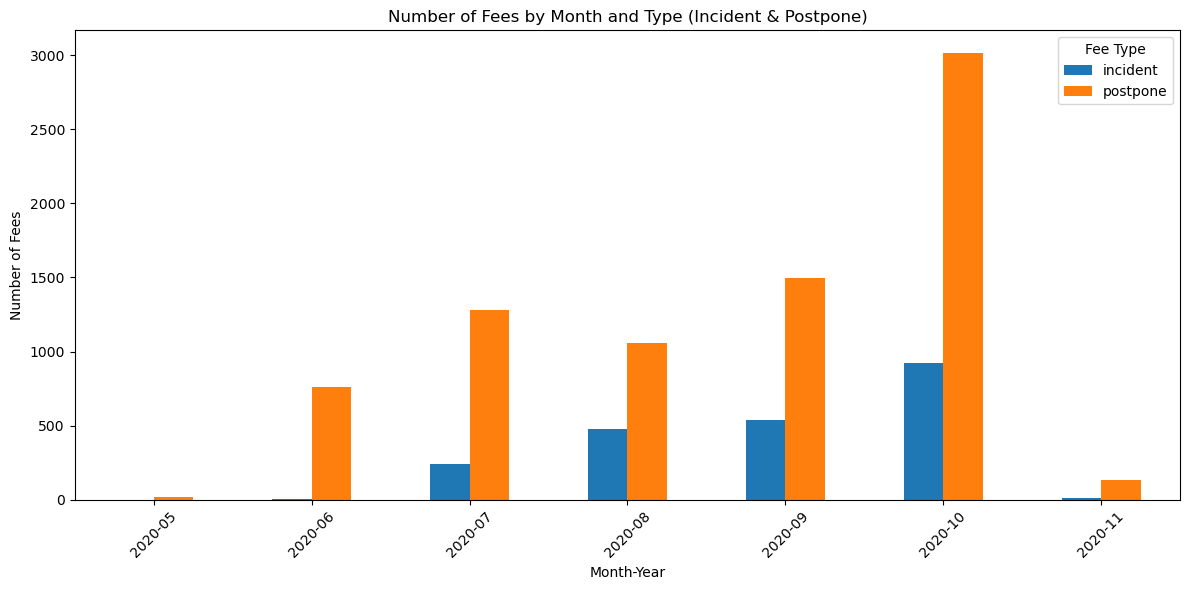

In [343]:
# Group by MonthYear and F_type, and count the occurrences
grouped_fees = fees_reason.groupby(['MonthYear', 'F_type']).size().unstack(fill_value=0)

# Plot the data
grouped_fees.plot(kind='bar', figsize=(12, 6))

# Customize the plot
plt.title("Number of Fees by Month and Type (Incident & Postpone)")
plt.xlabel("Month-Year")
plt.ylabel("Number of Fees")
plt.xticks(rotation=45)
plt.legend(title="Fee Type")
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\maria.aguilar\AppData\Local\Temp\ipykernel_33340\3661779587.py:20: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  fpdr_data['F_creation_month'] = fpdr_data['F_created_at'].dt.to_period('M')


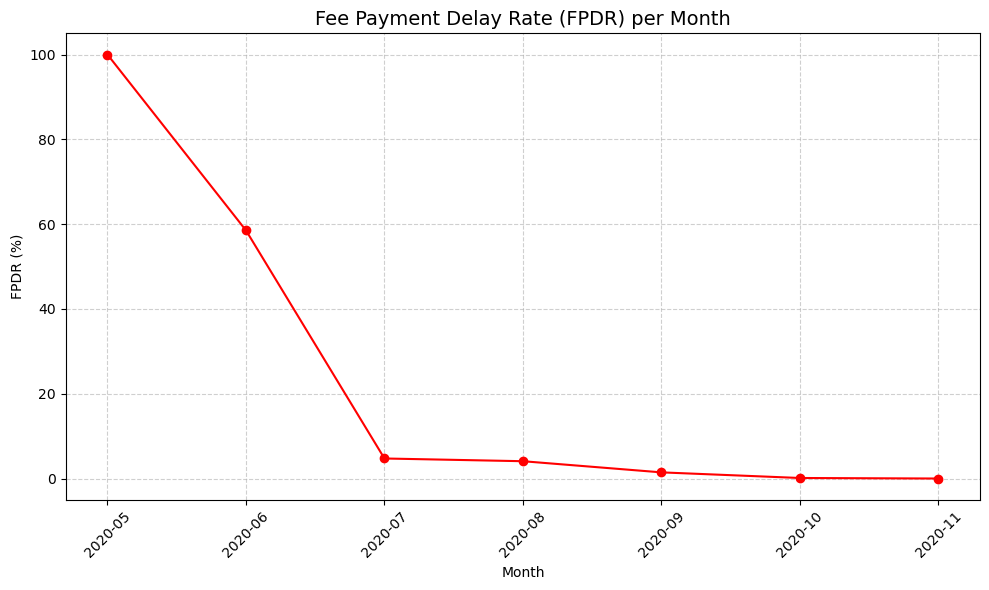

In [348]:
#metric from patri's assumption that some fees have delay if paid_fees date of payment is empty

###  Fee Payment Delay Rate (FPDR)
# Formula: FPDR = (accepted fees with no paid_at date) / (total accepted fees) * 100
# Definition: The FPDR represents the percentage of accepted fees that have not been paid by the user.
# This metric provides insight into potential payment compliance issues. Users who accept fees but don't pay them may indicate financial stress or lack of commitment to the platform.
# New Metric: Fee Payment Delay Rate
# Goal: We want to measure how many accepted fees remain unpaid each month, since we suspect that there’s a significant gap between accepted fees and those that are actually paid.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Make a copy of the merged DataFrame so we do not modify original merged dataset
fpdr_data = merged_df.copy()
#Filter only accepted fees (the ones that should generate income)
fpdr_data = fpdr_data[fpdr_data['F_status'] == 'accepted']
#Convert date columns to datetime format (to manipulate and group by month)
fpdr_data['F_created_at'] = pd.to_datetime(fpdr_data['F_created_at'], errors='coerce')
fpdr_data['F_paid_at'] = pd.to_datetime(fpdr_data['F_paid_at'], errors='coerce')
#Create a column with just the month of creation
fpdr_data['F_creation_month'] = fpdr_data['F_created_at'].dt.to_period('M')
#Count total accepted fees per month
total_accepted_fees = fpdr_data.groupby('F_creation_month')['F_id'].nunique().reset_index()
total_accepted_fees.rename(columns={'F_id': 'Total_Accepted_Fees'}, inplace=True)
#Count unpaid fees (where 'F_paid_at' is still missing)
unpaid_fees = fpdr_data[fpdr_data['F_paid_at'].isna()]
unpaid_per_month = unpaid_fees.groupby('F_creation_month')['F_id'].nunique().reset_index()
unpaid_per_month.rename(columns={'F_id': 'Unpaid_Fees'}, inplace=True)
#Merge both tables and calculate the Fee Payment Delay Rate (FPDR)
fpdr = pd.merge(total_accepted_fees, unpaid_per_month, on='F_creation_month', how='left')
fpdr['Unpaid_Fees'] = fpdr['Unpaid_Fees'].fillna(0)
# Formula: FPDR = (accepted fees with no paid_at date) / (total accepted fees) * 100
fpdr['FPDR (%)'] = (fpdr['Unpaid_Fees'] / fpdr['Total_Accepted_Fees']) * 100
#Plotting results
plt.figure(figsize=(10, 6))
plt.plot(fpdr['F_creation_month'].astype(str), fpdr['FPDR (%)'], marker='o', color='red')
plt.title('Fee Payment Delay Rate (FPDR) per Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('FPDR (%)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
